In [2]:
import numpy as np
import pandas as pd
import random

In [3]:
mo = pd.read_csv('monday.csv',sep=';',parse_dates=True)
tu = pd.read_csv('tuesday.csv',sep=';',parse_dates=True)
we = pd.read_csv('wednesday.csv',sep=';',parse_dates=True)
th = pd.read_csv('thursday.csv',sep=';',parse_dates=True)
fr = pd.read_csv('friday.csv',sep=';',parse_dates=True)

In [4]:
mo

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices
...,...,...,...
4879,2019-09-02 21:49:00,1442,checkout
4880,2019-09-02 21:49:00,1444,checkout
4881,2019-09-02 21:49:00,1445,dairy
4882,2019-09-02 21:50:00,1446,dairy


In [5]:
tu.customer_no += mo.customer_no.max()
we.customer_no += tu.customer_no.max()
th.customer_no += we.customer_no.max()
fr.customer_no += th.customer_no.max()

In [6]:
th

,timestamp,customer_no,location
0,2019-09-05 07:00:00,4401,drinks
1,2019-09-05 07:01:00,4402,fruit
2,2019-09-05 07:01:00,4403,dairy
3,2019-09-05 07:01:00,4404,dairy
4,2019-09-05 07:02:00,4401,checkout
...,...,...,...
5099,2019-09-05 21:48:00,5933,dairy
5100,2019-09-05 21:48:00,5934,fruit
5101,2019-09-05 21:48:00,5935,spices
5102,2019-09-05 21:49:00,5934,checkout


In [7]:
df = pd.concat([mo,tu,we,th,fr])
df

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices
...,...,...,...
5120,2019-09-06 21:50:00,7435,dairy
5121,2019-09-06 21:50:00,7442,checkout
5122,2019-09-06 21:50:00,7443,checkout
5123,2019-09-06 21:50:00,7444,drinks


In [8]:
df[4880:4890]

,timestamp,customer_no,location
4880,2019-09-02 21:49:00,1444,checkout
4881,2019-09-02 21:49:00,1445,dairy
4882,2019-09-02 21:50:00,1446,dairy
4883,2019-09-02 21:50:00,1447,fruit
0,2019-09-03 07:02:00,1448,fruit
1,2019-09-03 07:02:00,1449,drinks
2,2019-09-03 07:03:00,1450,dairy
3,2019-09-03 07:05:00,1448,drinks
4,2019-09-03 07:06:00,1451,dairy
5,2019-09-03 07:06:00,1452,dairy


In [9]:
df.location.unique()

array(['dairy', 'spices', 'fruit', 'checkout', 'drinks'], dtype=object)

In [10]:
df.sort_values(by=['customer_no','timestamp'],inplace=True)
df.head(20)

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
8,2019-09-02 07:05:00,1,checkout
1,2019-09-02 07:03:00,2,dairy
12,2019-09-02 07:06:00,2,checkout
2,2019-09-02 07:04:00,3,dairy
13,2019-09-02 07:06:00,3,checkout
3,2019-09-02 07:04:00,4,dairy
24,2019-09-02 07:08:00,4,checkout
4,2019-09-02 07:04:00,5,spices
9,2019-09-02 07:05:00,5,checkout


In [11]:
df['location_'] = df['location'] 

In [12]:
df.location_=df.location_.shift(-1)
df.location_.at[5124] = 'checkout'

In [13]:
df.tail(20)

,timestamp,customer_no,location,location_
5094,2019-09-06 21:42:00,7435,spices,fruit
5101,2019-09-06 21:46:00,7435,fruit,dairy
5120,2019-09-06 21:50:00,7435,dairy,fruit
5102,2019-09-06 21:46:00,7436,fruit,checkout
5109,2019-09-06 21:48:00,7436,checkout,fruit
5103,2019-09-06 21:46:00,7437,fruit,checkout
5105,2019-09-06 21:47:00,7437,checkout,dairy
5106,2019-09-06 21:47:00,7438,dairy,drinks
5117,2019-09-06 21:49:00,7438,drinks,fruit
5107,2019-09-06 21:47:00,7439,fruit,checkout


In [14]:
df.loc[df.location == 'checkout', 'location_']='checkout'

In [15]:
df.tail(20)

,timestamp,customer_no,location,location_
5094,2019-09-06 21:42:00,7435,spices,fruit
5101,2019-09-06 21:46:00,7435,fruit,dairy
5120,2019-09-06 21:50:00,7435,dairy,fruit
5102,2019-09-06 21:46:00,7436,fruit,checkout
5109,2019-09-06 21:48:00,7436,checkout,checkout
5103,2019-09-06 21:46:00,7437,fruit,checkout
5105,2019-09-06 21:47:00,7437,checkout,checkout
5106,2019-09-06 21:47:00,7438,dairy,drinks
5117,2019-09-06 21:49:00,7438,drinks,fruit
5107,2019-09-06 21:47:00,7439,fruit,checkout


In [16]:

tm = pd.crosstab(df.location, df.location_, normalize='index')
tm

location_,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000
dairy,0.390041,0.001282,0.222697,0.190425,0.195555
drinks,0.536748,0.027145,0.000000,0.219206,0.216901
fruit,0.498829,0.237993,0.136861,0.000586,0.125732
spices,0.250932,0.323655,0.272776,0.152371,0.000266


In [17]:
tm_ = tm.transpose()
tm_

location,checkout,dairy,drinks,fruit,spices
location_,,,,,
checkout,1.0,0.390041,0.536748,0.498829,0.250932
dairy,0.0,0.001282,0.027145,0.237993,0.323655
drinks,0.0,0.222697,0.000000,0.136861,0.272776
fruit,0.0,0.190425,0.219206,0.000586,0.152371
spices,0.0,0.195555,0.216901,0.125732,0.000266


In [18]:
tm_.dairy.sum(), tm_.drinks.sum(), tm_.fruit.sum(), tm_.spices.sum()

(0.9999999999999999, 1.0, 0.9999999999999999, 0.9999999999999999)

<AxesSubplot:xlabel='location_', ylabel='location'>

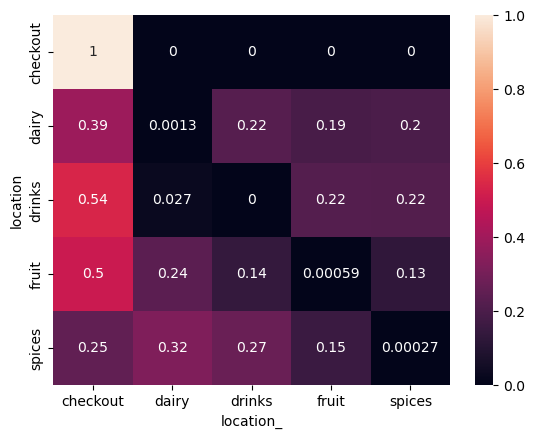

In [19]:
import seaborn as sns

sns.heatmap(data=tm, annot=True)

In [20]:
tm.columns

Index(['checkout', 'dairy', 'drinks', 'fruit', 'spices'], dtype='object', name='location_')

In [21]:
state = np.array((0.,0,0,0,1))
state.T

array([0., 0., 0., 0., 1.])

In [22]:
tm0 = np.array(tm)
tm0

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [3.90040607e-01, 1.28232528e-03, 2.22697158e-01, 1.90425305e-01,
        1.95554606e-01],
       [5.36747759e-01, 2.71446863e-02, 0.00000000e+00, 2.19206146e-01,
        2.16901408e-01],
       [4.98828583e-01, 2.37992971e-01, 1.36860601e-01, 5.85708708e-04,
        1.25732136e-01],
       [2.50932339e-01, 3.23654768e-01, 2.72775706e-01, 1.52370804e-01,
        2.66382525e-04]])

In [23]:
all_states = [tm.columns[0], tm.columns[1], tm.columns[2], tm.columns[3], tm.columns[4]]
all_states

['checkout', 'dairy', 'drinks', 'fruit', 'spices']

In [24]:
all_states.index('drinks')

2

In [26]:

class Customer:

    def __init__(self, id, state):#, active):
        self.id = id
        self.state = state
        self.status = 'new'
        
    def next_state(self, trans_matrix):
        self.state = np.random.choice(all_states, p=trans_matrix[all_states.index(self.state)])
        return self.state


class Supermarkt:

    def __init__(self):
        self.customerlist = []

    def add_customer(self, id):
        c = Customer(id, np.random.choice(all_states[1:]))
        self.customerlist.append(c)

    def rm_customer(self, obj):
        self.customerlist.remove(obj)
        del obj


def addCustomers(cid, supermarket):
    for n in range(int(np.random.normal(1,1))):
        supermarket.add_customer(cid)
        cid += 1
    return cid

def rmCustomers(supermarket):
    for n in supermarket.customerlist:
        if n.status == 'out':
            supermarket.rm_customer(n)




In [28]:
doodl_df = pd.DataFrame(columns=['timestep','customer_id','state'])
doodl_df

,timestep,customer_id,state


In [45]:

doodl = Supermarkt()
custid = 0
for t in range(600):
    rmCustomers(doodl)
    custid = addCustomers(custid, doodl)
    
    for obj in doodl.customerlist:
        if obj.status == 'out':
            continue
        if obj.status == 'new':
            s1 = pd.Series({'timestep':t,'customer_id':obj.id,'state':obj.state}).to_frame().T
            doodl_df = pd.concat([doodl_df,s1],ignore_index=True)
            obj.status = 'cur'
            continue
        obj.next_state(tm0)
        if obj.state == 'checkout':
            obj.status = 'out'
        s1 = pd.Series({'timestep':t,'customer_id':obj.id,'state':obj.state}).to_frame().T
        doodl_df = pd.concat([doodl_df,s1],ignore_index=True)


In [46]:
doodl_df

,timestep,customer_id,state
0,1,0,spices
1,2,0,dairy
2,3,0,drinks
3,4,0,checkout
4,4,1,dairy
...,...,...,...
1372,597,412,dairy
1373,598,412,fruit
1374,599,412,checkout
1375,599,413,fruit
